In [20]:
import pandas as pd
import numpy as np

letters = [
    'A',
    'B',
    'C',
    'D',
    'E',
    'F',
    'G',
    'H',
    'I',
    'J',
    'K',
    'L',
    'M',
    'N',
    'O',
    'P',
    'Q',
    'R',
    'S',
    'T',
    'U',
    'V',
    'W',
    'X',
    'Y',
    'Z'
]

letterNums = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
df = pd.read_csv(url, header=None)
df = df.sort_values([0]).rename(index=str, columns={0:"letter", 1:"x-pos", 2:"y-pos", 3:"width", 4:"height", 5:"numPixels", 6:"meanXPixels", 7:"meanYPixels", 8:"meanXVar", 9:"meanYVar", 10:"meanXYCor", 11:"meanXXY", 12:"meanXYY", 13:"meanEdgeCnt", 14:"xEdgCorr", 15:"meanYEdge", 16:"yEdgeCorr"})
df['letter'].replace(letters, letterNums, inplace=True)


# Normalize all values by max
for i in range(16):
    df['x-pos'].replace(i, i / max(df['x-pos']), inplace=True)
    df['y-pos'].replace(i, i / max(df['y-pos']), inplace=True)
    df['width'].replace(i, i / max(df['width']), inplace=True)
    df['height'].replace(i, i / max(df['height']), inplace=True)
    df['numPixels'].replace(i, i / max(df['numPixels']), inplace=True)
    df['meanXPixels'].replace(i, i / max(df['meanXPixels']), inplace=True)
    df['meanYPixels'].replace(i, i / max(df['meanYPixels']), inplace=True)
    df['meanXVar'].replace(i, i / max(df['meanXVar']), inplace=True)
    df['meanYVar'].replace(i, i / max(df['meanYVar']), inplace=True)
    df['meanXYCor'].replace(i, i / max(df['meanXYCor']), inplace=True)
    df['meanXXY'].replace(i, i / max(df['meanXXY']), inplace=True)
    df['meanXYY'].replace(i, i / max(df['meanXYY']), inplace=True)
    df['meanEdgeCnt'].replace(i, i / max(df['meanEdgeCnt']), inplace=True)
    df['xEdgCorr'].replace(i, i / max(df['xEdgCorr']), inplace=True)
    df['meanYEdge'].replace(i, i / max(df['meanYEdge']), inplace=True)
    df['yEdgeCorr'].replace(i, i / max(df['yEdgeCorr']), inplace=True)
                     

df = df.values

# labels
letter_labels = df[:,0]
letter_labels = letter_labels.reshape(-1,1)

# data
letter_data = df[...,1:]

# for i, col in enumerate(letter_data.tolist(), 1):
#     letter_data.loc[:, col] *= i
# letter_data = letter_data.sum(axis=1)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, y_train, y_test = train_test_split(letter_labels, letter_data, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: bad input shape (14000, 16)

/Users/newowner/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label 21 is present in all training examples.
  str(classes[c]))
/Users/newowner/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label 24 is present in all training examples.
  str(classes[c]))
/Users/newowner/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label 21 is present in all training examples.
  str(classes[c]))
/Users/newowner/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label 24 is present in all training examples.
  str(classes[c]))


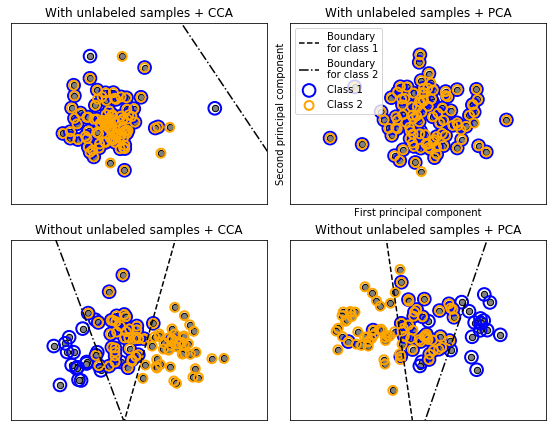

In [19]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(n_classes=26, n_labels=26,
                                      allow_unlabeled=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()